In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
listing = pd.read_csv('./data/listings.csv', sep=',')
calender = pd.read_csv('./data/calendar.csv', sep=',')
reviews = pd.read_csv('./data/reviews.csv', sep=',')

In [3]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
calender.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [5]:
calender.tail()

,listing_id,date,available,price
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN
1308889,14504422,2016-09-06,f,NaN


In [6]:
calender.shape

(1308890, 4)

In [7]:
calender.isnull().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [8]:
listing.shape

(3585, 95)

In [9]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [10]:
reviews.shape

(68275, 6)

In [11]:
listing.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 95, dtype: object

In [12]:
listing.sample(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2645,7308811,https://www.airbnb.com/rooms/7308811,20160906204935,2016-09-07,Spacious 1BR on Green Line - BC BU,Stay in this charming one bedroom right on the...,Stay in this charming one bedroom right on the...,Stay in this charming one bedroom right on the...,none,NaN,...,9.0,f,NaN,NaN,f,strict,f,f,1,0.16
3046,6798777,https://www.airbnb.com/rooms/6798777,20160906204935,2016-09-07,Luxury 2 bedroom in Boston Seaport,"This is a beautiful two bedroom, two full bath...",There is a queen bed in one bedroom and a pull...,"This is a beautiful two bedroom, two full bath...",none,This neighborhood is known as a night spot and...,...,NaN,f,NaN,NaN,f,strict,f,f,1,NaN


In [13]:
listing.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 95, dtype: object

In [14]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [15]:
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


# Data Wrangling

In [17]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [18]:
# Dropping columns with zero values
listing.drop(['license', 'jurisdiction_names', 'neighbourhood_group_cleansed', 'has_availability'], axis=1, inplace=True)

In [19]:
#Changing datatypes to meaningful datatypes according to values.
listing['last_scraped'] = pd.to_datetime(listing.last_scraped)

In [20]:
# Function to change price columns to float
def change_to_float(data, column):
    data[column] = data[column].str.lstrip('$').str.replace(',','').astype(float)


In [21]:
change_to_float(listing, 'price')
change_to_float(listing, 'security_deposit')

In [22]:
print (listing.bedrooms.min())
print (listing.bathrooms.min())
print (listing.accommodates.min())

0.0
0.0
1


In [23]:
listing.shape

(3585, 91)

In [24]:
listing.bedrooms.isnull().sum(), listing.bathrooms.isnull().sum()

(10, 14)

In [25]:
listing.dropna(subset=['bedrooms'], axis=0, inplace= True)

In [26]:
listing.dropna(subset=['bathrooms'], axis=0, inplace= True)

In [27]:
listing.bedrooms.isnull().sum(), listing.bathrooms.isnull().sum()

(0, 0)

In [28]:
# Converting the bedroom and bathroom from float to int
listing.bedrooms = listing.bedrooms.astype('int')
listing.bathrooms = listing.bathrooms.astype('int')

In [29]:
listing[['bathrooms', 'bedrooms']].head()

,bathrooms,bedrooms
0,1,2
1,1,1
2,1,1
3,1,1
4,1,1


In [30]:
listing.shape

(3561, 91)

In [31]:
listing.duplicated().sum()

0

In [32]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3561 entries, 0 to 3584
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3561 non-null   int64         
 1   listing_url                       3561 non-null   object        
 2   scrape_id                         3561 non-null   int64         
 3   last_scraped                      3561 non-null   datetime64[ns]
 4   name                              3561 non-null   object        
 5   summary                           3435 non-null   object        
 6   space                             2505 non-null   object        
 7   description                       3561 non-null   object        
 8   experiences_offered               3561 non-null   object        
 9   neighborhood_overview             2164 non-null   object        
 10  notes                             1606 non-null 

In [33]:
# Filling NaN with 0
listing.fillna(0, inplace=True)

In [34]:
listing.shape

(3561, 91)

In [35]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3561 entries, 0 to 3584
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3561 non-null   int64         
 1   listing_url                       3561 non-null   object        
 2   scrape_id                         3561 non-null   int64         
 3   last_scraped                      3561 non-null   datetime64[ns]
 4   name                              3561 non-null   object        
 5   summary                           3561 non-null   object        
 6   space                             3561 non-null   object        
 7   description                       3561 non-null   object        
 8   experiences_offered               3561 non-null   object        
 9   neighborhood_overview             3561 non-null   object        
 10  notes                             3561 non-null 

In [36]:
listing.city.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'Jamaica plain ', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', '波士顿',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Watertown', 'Brighton',
       'Brighton ', 'Boston ', 0, 'West Roxbury', 'Newton', 'Hyde Park',
       'Mattapan', 'Milton', 'Dorchester', 'dorchester, boston ',
       'South Boston', 'Allston', 'ALLSTON'], dtype=object)

#### Some of the values are repeated several times with capital letters etc.. so we have to cater those values to make the city column consistent as well as their is an ambiguous city name that is not in english so we have to drop that too.

In [37]:
listing[listing.city == '波士顿']

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
485,4625517,https://www.airbnb.com/rooms/4625517,20160906204935,2016-09-07,GreenT&bus stops in front of door,Super convenient :30 seconds walk to Green T a...,"Awesome area of Brookline&Boston, one block fr...",Super convenient :30 seconds walk to Green T a...,none,Connivence to almost everywhere- penguins piz...,...,0.0,0.0,0.0,f,f,strict,f,f,1,0.0


In [38]:
listing.drop(index = 485, inplace=True)

In [39]:
listing[listing.id == 4625517]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


In [40]:
listing.sample(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
861,3343428,https://www.airbnb.com/rooms/3343428,20160906204935,2016-09-07,Brownstone Custom Bedroom,"Custom, well-designed bedroom, 170sqft (15.7sq...",A well balanced blend of modern and historic. ...,"Custom, well-designed bedroom, 170sqft (15.7sq...",none,"Located in historic Fort Hill (Highland Park),...",...,10.0,9.0,10.0,f,f,moderate,f,f,6,1.68
3085,7134081,https://www.airbnb.com/rooms/7134081,20160906204935,2016-09-07,Made in Fort Point / Seaport Luxury,315 on A is a beautiful property in Boston's F...,This is one of the most unique floorplans in a...,315 on A is a beautiful property in Boston's F...,none,"""The Innovation District"" is the hottest, upco...",...,10.0,10.0,10.0,f,f,strict,f,f,2,0.87


In [41]:
listing.cancellation_policy.unique()

array(['moderate', 'flexible', 'strict', 'super_strict_30'], dtype=object)

In [42]:
listing.cancellation_policy.value_counts()

strict             1576
flexible            994
moderate            915
super_strict_30      75
Name: cancellation_policy, dtype: int64

In [43]:
cpp= listing.groupby('cancellation_policy')['price'].mean()
cpp

cancellation_policy
flexible           149.274648
moderate           162.928962
strict             188.451777
super_strict_30    335.240000
Name: price, dtype: float64

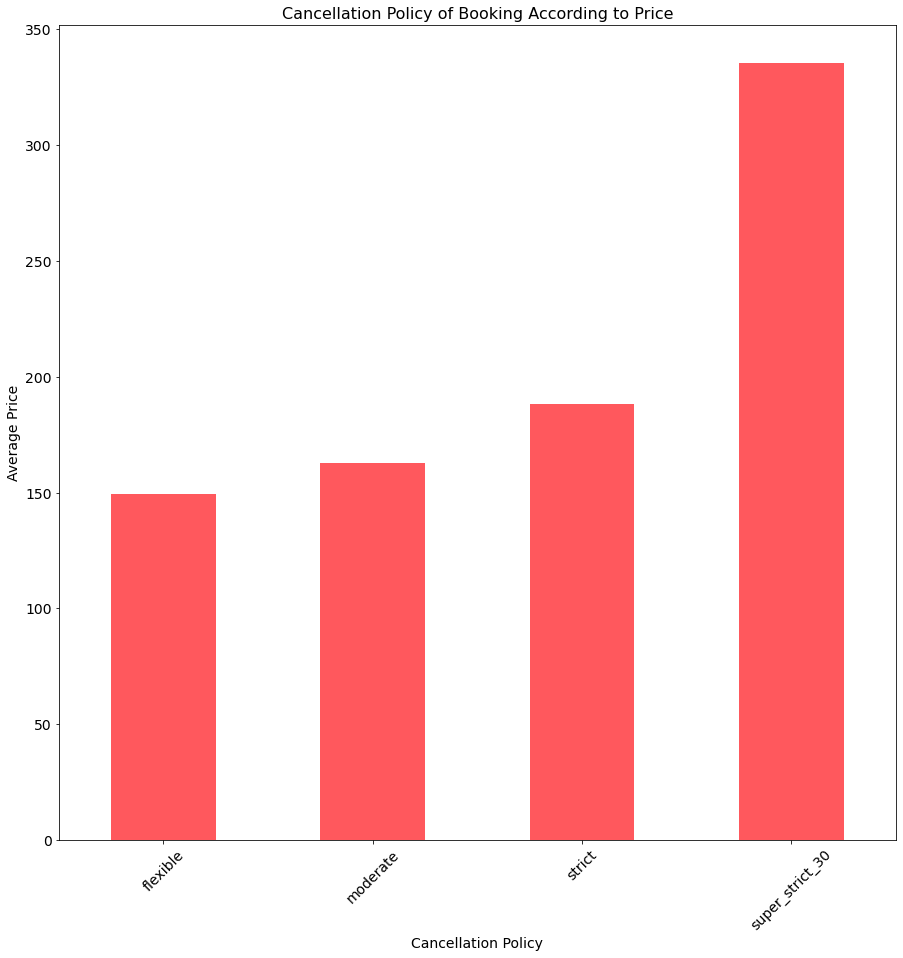

In [44]:
cpp.plot.bar(figsize=(15,15), color='#FF585D');
plt.title('Cancellation Policy of Booking According to Price', fontsize=16);
plt.xlabel('Cancellation Policy', fontsize=14);
plt.ylabel('Average Price', fontsize=14);
plt.xticks(rotation = 45);
plt.tick_params(labelsize=14);

In [45]:
# Fixing the city names to make them consistent for visualization.
listing['city_clean'] = listing.city.copy()

In [46]:
listing['city_clean'] = listing.city_clean.str.lower()
listing['city_clean'] = listing.city_clean.str.title()

In [47]:
listing.city_clean.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, Ma',
       'Boston (Jamaica Plain)', 'Mission Hill, Boston',
       'Boston, Massachusetts, Us', 'South End, Boston', 'Cambridge',
       'East Boston', 'East Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Watertown', 'Brighton',
       'Brighton ', 'Boston ', nan, 'West Roxbury', 'Newton', 'Hyde Park',
       'Mattapan', 'Milton', 'Dorchester', 'Dorchester, Boston ',
       'South Boston', 'Allston'], dtype=object)

In [48]:
# Roslindale, Boston, Jamaica Plain, Boston, Jamaica Plain (Boston),Jamaica Plain , Ma, Boston (Jamaica Plain), 
# Mission Hill, Boston, Boston, Massachusetts, Us, South End, Boston, Boston (Charlestown), Brighton , Dorchester, Boston 

listing['city_clean'] = listing.city_clean.replace('Roslindale, Boston', 'Roslindale')
listing['city_clean'] = listing.city_clean.replace(['Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
                                                   'Jamaica Plain ', 'Jamaica Plain , Ma','Jamaica Plain, Ma','Boston (Jamaica Plain)'], 
                                                   'Jamaica Plain')
listing['city_clean'] = listing.city_clean.replace('Mission Hill, Boston', 'Mission Hill')
listing['city_clean'] = listing.city_clean.replace(['Boston, Massachusetts, Us', 'Boston '], 'Boston')
listing['city_clean'] = listing.city_clean.replace('South End, Boston', 'South End')
listing['city_clean'] = listing.city_clean.replace('Boston (Charlestown)', 'Charlestown')
listing['city_clean'] = listing.city_clean.replace('Brighton ', 'Brighton')
listing['city_clean'] = listing.city_clean.replace('Dorchester, Boston ', 'Dorchester')

In [49]:
listing.city_clean.unique()

array(['Boston', 'Roslindale', 'Jamaica Plain', 'Brookline',
       'Roxbury Crossing', 'Mission Hill', 'South End', 'Cambridge',
       'East Boston', 'East Boston ', 'Charlestown', 'Somerville',
       'Watertown', 'Brighton', nan, 'West Roxbury', 'Newton',
       'Hyde Park', 'Mattapan', 'Milton', 'Dorchester', 'South Boston',
       'Allston'], dtype=object)

In [50]:
Expensive= listing.groupby('city_clean')['price'].mean().sort_values()
Expensive

city_clean
Milton               50.000000
Watertown            60.000000
Dorchester           75.600000
Hyde Park            77.500000
East Boston          80.000000
Mission Hill         85.000000
Mattapan             85.000000
West Roxbury         85.600000
Allston              86.357143
Newton               90.000000
Somerville           91.947368
Roxbury Crossing     94.392857
Roslindale           99.714286
Brighton            107.250000
South Boston        132.000000
East Boston         134.666667
Brookline           135.888889
Jamaica Plain       155.769231
Boston              176.730220
Cambridge           199.375000
Charlestown         258.625000
South End           450.000000
Name: price, dtype: float64

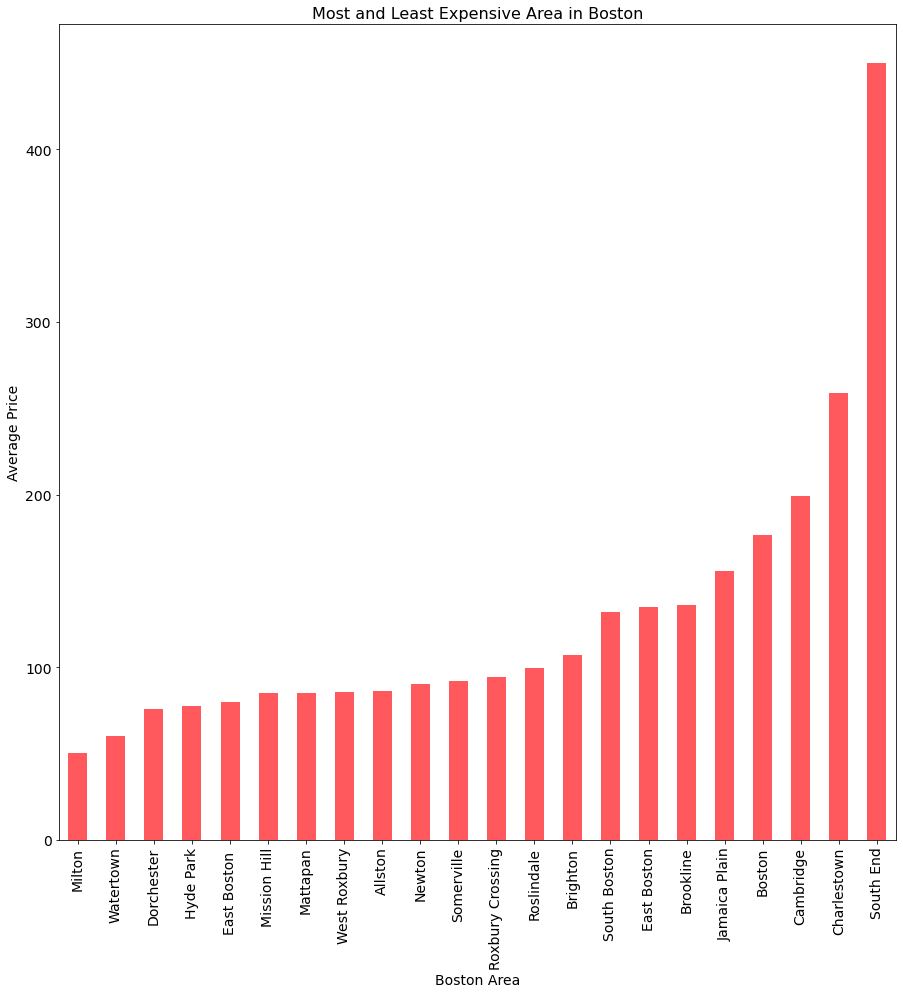

In [51]:
Expensive.plot.bar(figsize=(15,15), color='#FF585D');
plt.title('Most and Least Expensive Area in Boston', fontsize=16);
plt.xlabel('Boston Area', fontsize=14);
plt.ylabel('Average Price', fontsize=14);
plt.xticks(rotation = 90);
plt.tick_params(labelsize=14);

In [52]:
listing.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [53]:
rtp = listing.groupby('room_type')['price'].mean()
rtp

room_type
Entire home/apt    227.552295
Private room        96.051170
Shared room         93.493671
Name: price, dtype: float64

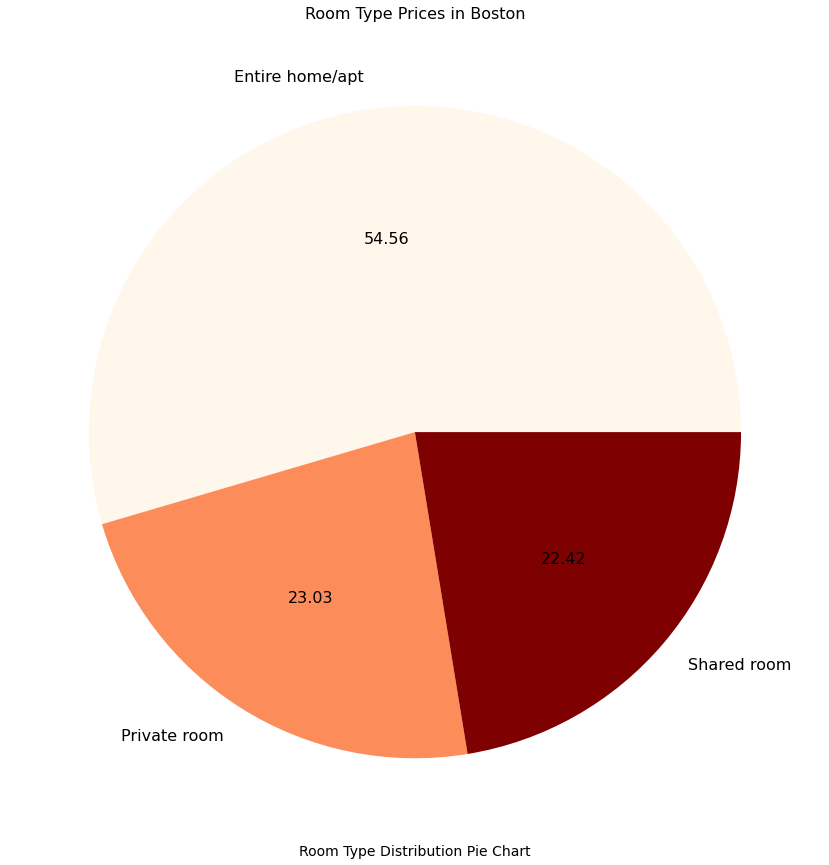

In [54]:
rtp.plot.pie(figsize=(15,15), autopct = '%.2f', fontsize=16, cmap = 'OrRd');
plt.title('Room Type Prices in Boston', fontsize=16);
plt.xlabel('Room Type Distribution Pie Chart', fontsize=14);
plt.ylabel('');

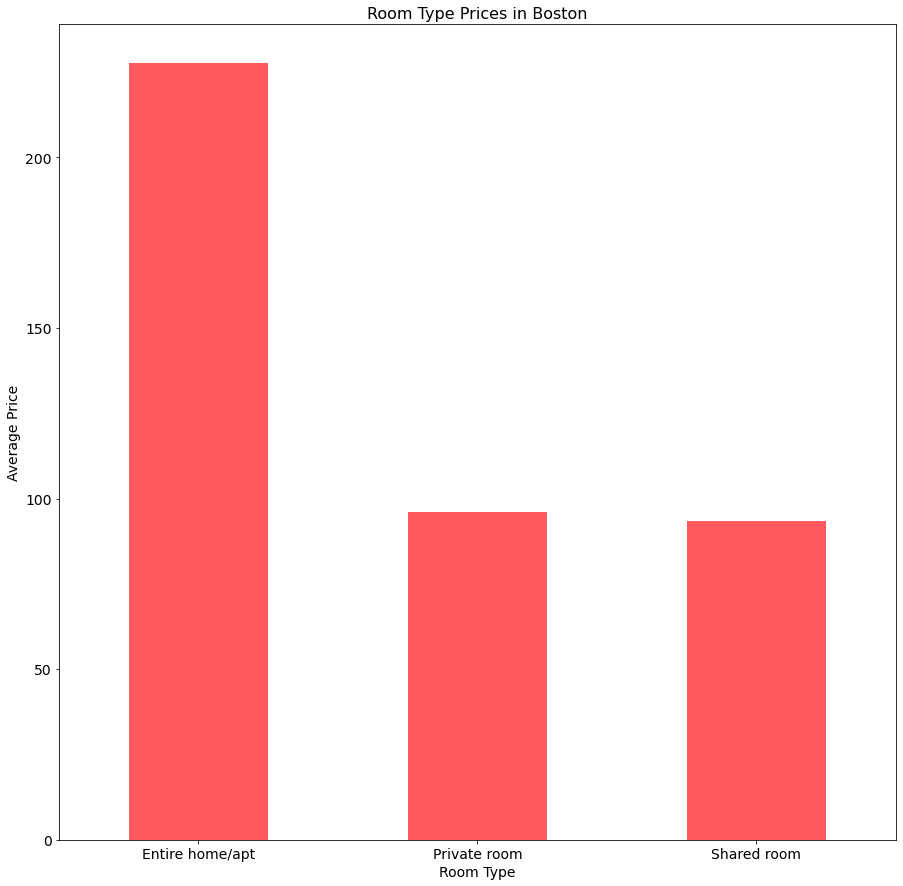

In [55]:
rtp.plot.bar(figsize=(15,15), color='#FF585D');
plt.title('Room Type Prices in Boston', fontsize=16);
plt.xlabel('Room Type', fontsize=14);
plt.ylabel('Average Price', fontsize=14);
plt.xticks(rotation = 0);
plt.tick_params(labelsize=14);

In [56]:
listing.property_type.unique()

array(['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', 0, 'Camper/RV'], dtype=object)

In [57]:
ptp = listing[listing.property_type != 0]

In [58]:
pt_p = ptp.groupby('property_type')['price'].mean()
pt_p

property_type
Apartment          181.895954
Bed & Breakfast    131.000000
Boat               268.833333
Camper/RV           60.000000
Condominium        190.246753
Dorm                62.500000
Entire Floor       122.000000
Guesthouse         289.000000
House              132.210432
Loft               185.410256
Other              229.941176
Townhouse          149.037037
Villa              189.500000
Name: price, dtype: float64

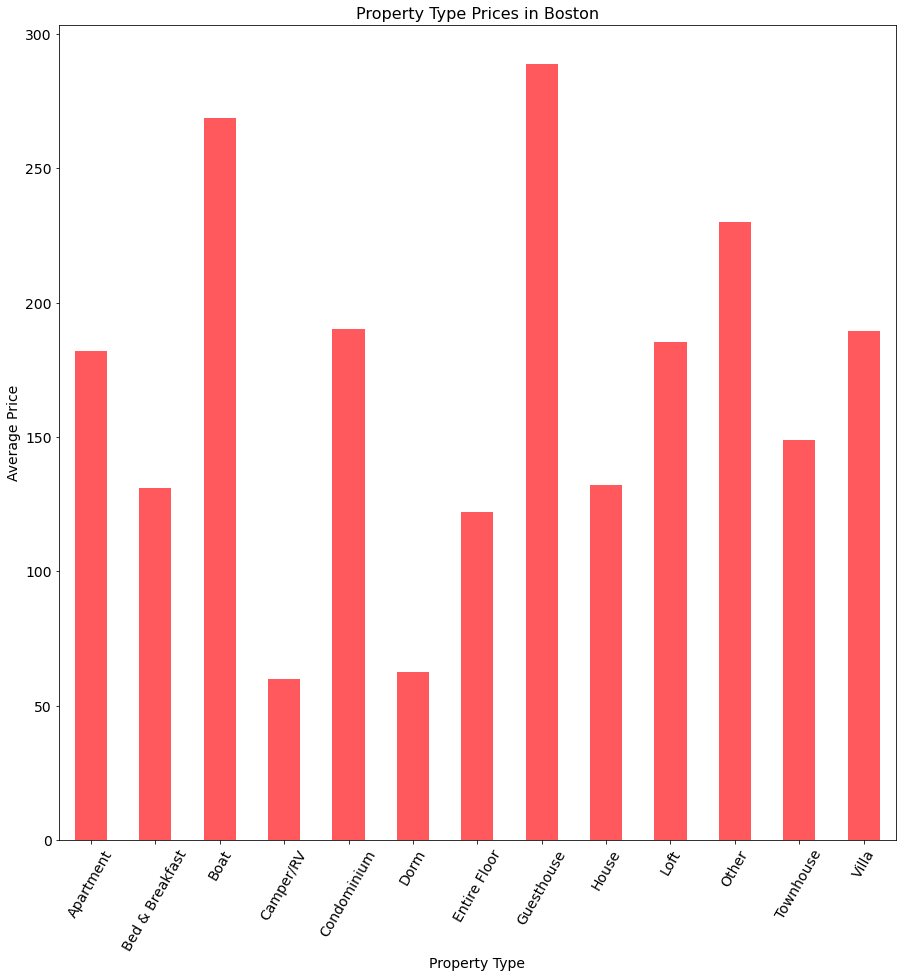

In [59]:
pt_p.plot.bar(figsize=(15,15), color='#FF585D');
plt.title('Property Type Prices in Boston', fontsize=16);
plt.xlabel('Property Type', fontsize=14);
plt.ylabel('Average Price', fontsize=14);
plt.xticks(rotation = 60);
plt.tick_params(labelsize=14);

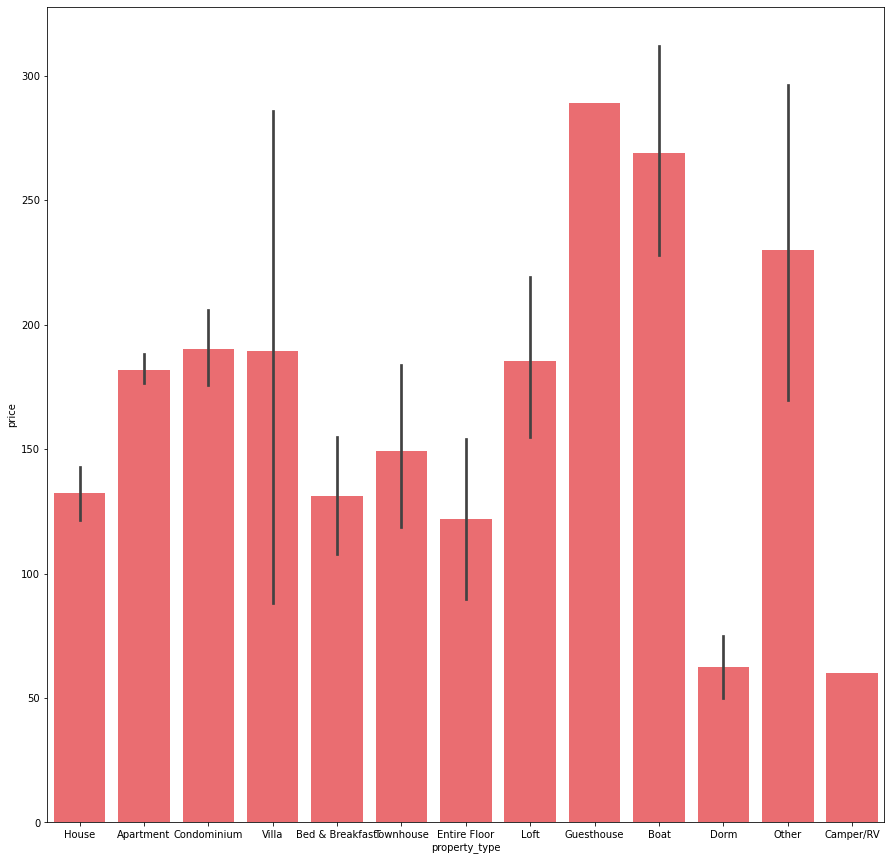

In [60]:
plt.figure(figsize=(15,15));
sns.barplot(data = ptp, x = 'property_type', y = 'price', color='#FF585D');

In [61]:
max_nights = ptp.groupby('property_type')['maximum_nights'].mean()
max_nights

property_type
Apartment          39381.166474
Bed & Breakfast      727.256410
Boat                 876.833333
Camper/RV           1125.000000
Condominium          804.792208
Dorm                1125.000000
Entire Floor         866.250000
Guesthouse          1125.000000
House                799.758993
Loft                 797.948718
Other                539.882353
Townhouse            869.907407
Villa                752.333333
Name: maximum_nights, dtype: float64

In [62]:
min_nights = ptp.groupby('property_type')['minimum_nights'].mean()
min_nights

property_type
Apartment          3.219653
Bed & Breakfast    9.461538
Boat               1.750000
Camper/RV          1.000000
Condominium        2.982684
Dorm               1.000000
Entire Floor       1.250000
Guesthouse         3.000000
House              2.937050
Loft               1.974359
Other              2.352941
Townhouse          1.925926
Villa              2.500000
Name: minimum_nights, dtype: float64

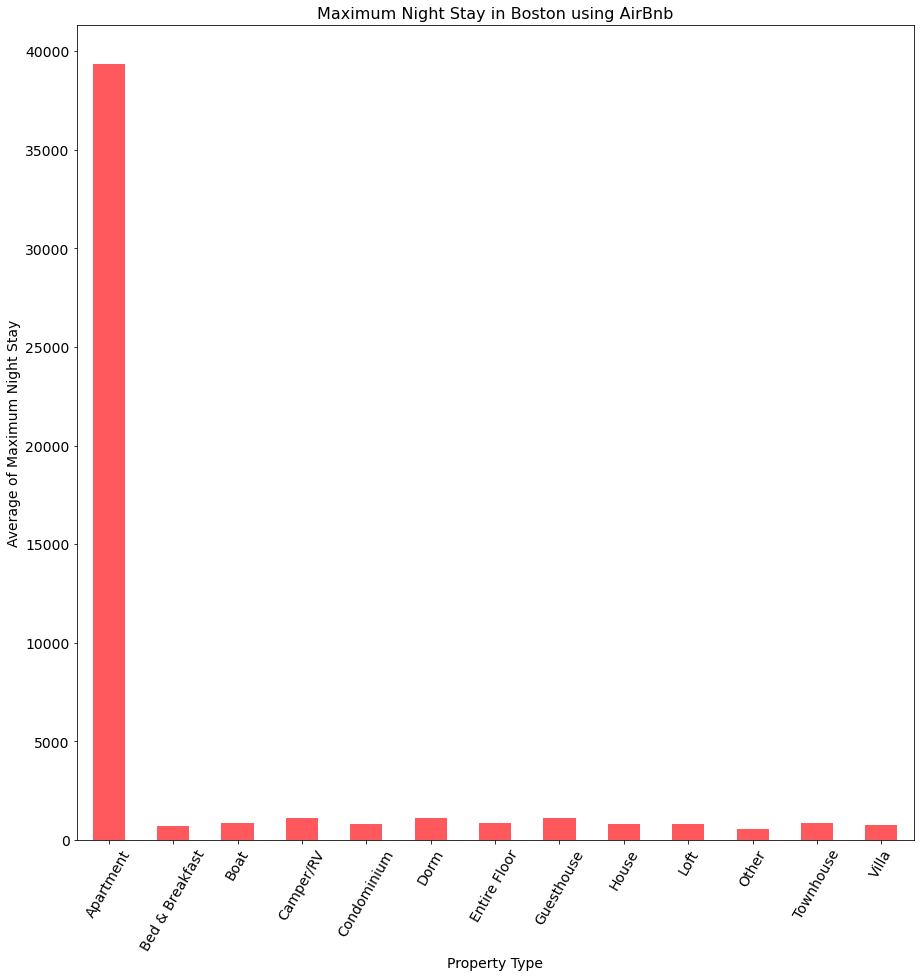

In [80]:
max_nights.plot.bar(figsize=(15,15), color='#FF585D');
plt.title('Maximum Night Stay in Boston using AirBnb', fontsize=16);
plt.xlabel('Property Type', fontsize=14);
plt.ylabel('Average of Maximum Night Stay', fontsize=14);
plt.xticks(rotation = 60);
plt.tick_params(labelsize=14);

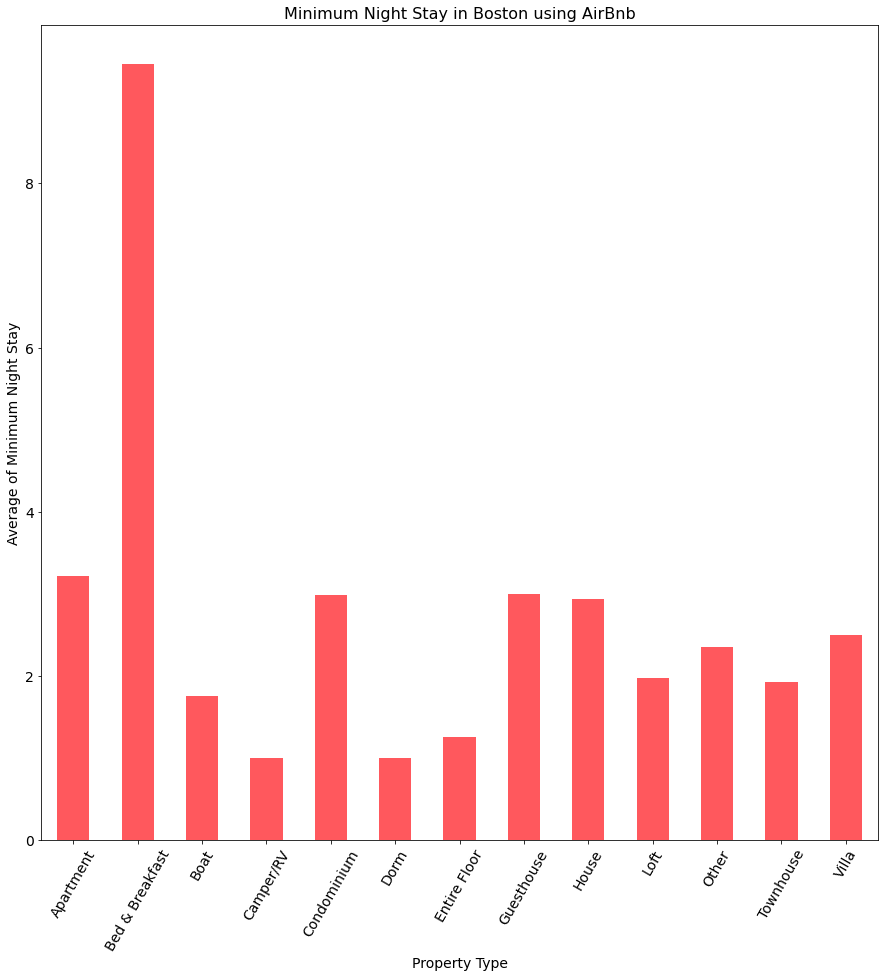

In [81]:
min_nights.plot.bar(figsize=(15,15), color='#FF585D');
plt.title('Minimum Night Stay in Boston using AirBnb', fontsize=16);
plt.xlabel('Property Type', fontsize=14);
plt.ylabel('Average of Minimum Night Stay', fontsize=14);
plt.xticks(rotation = 60);
plt.tick_params(labelsize=14);

In [74]:
sdp = ptp[ptp.security_deposit != 0]

In [75]:
sd_p = sdp.groupby('property_type')['security_deposit'].mean()
sd_p

property_type
Apartment          324.437037
Bed & Breakfast    350.000000
Boat               412.500000
Camper/RV          500.000000
Condominium        351.227642
Guesthouse         500.000000
House              310.221154
Loft               297.222222
Other              200.000000
Townhouse          325.000000
Name: security_deposit, dtype: float64

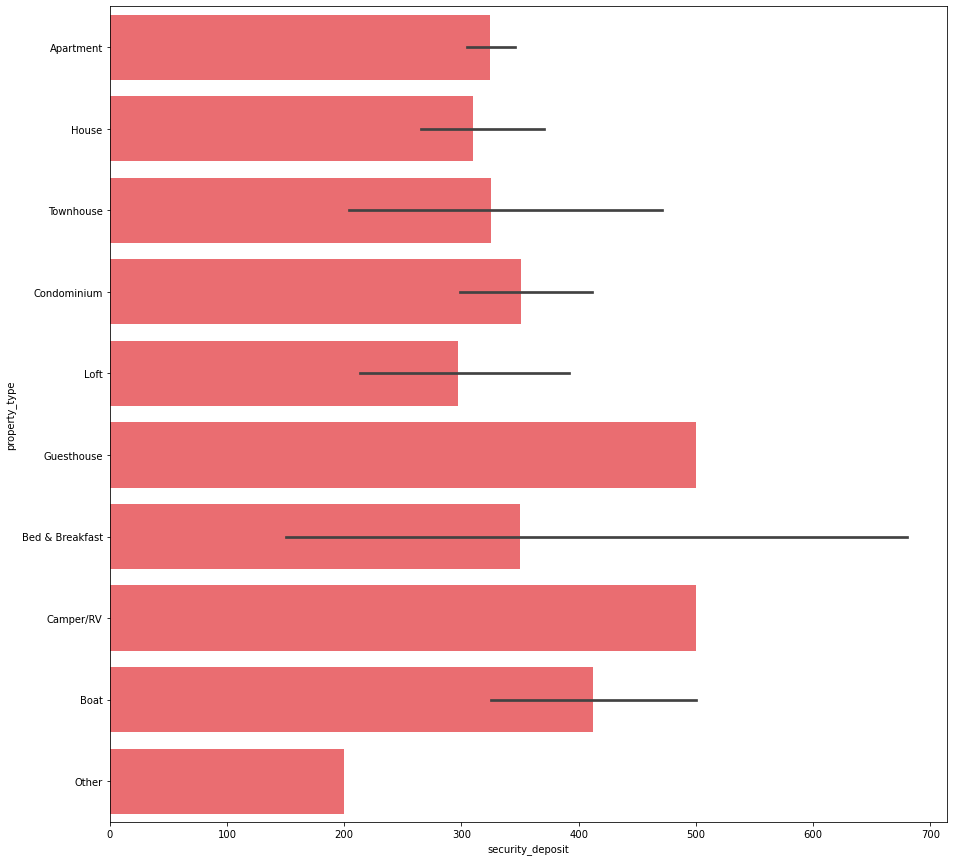

In [76]:
plt.figure(figsize=(15,15));
sns.barplot(data = sdp, x = 'security_deposit', y = 'property_type', color='#FF585D');

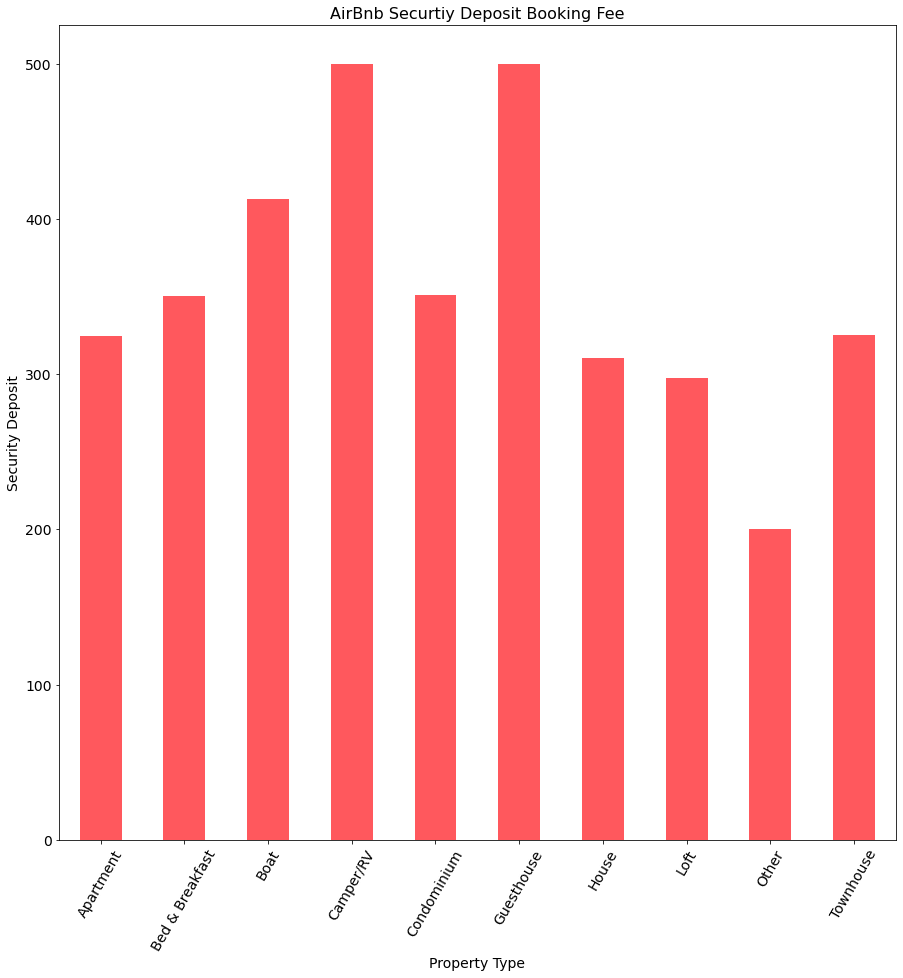

In [84]:
sd_p.plot.bar(figsize=(15,15), color='#FF585D');
plt.title('AirBnb Securtiy Deposit Booking Fee', fontsize=16);
plt.xlabel('Property Type', fontsize=14);
plt.ylabel('Security Deposit', fontsize=14);
plt.xticks(rotation = 60);
plt.tick_params(labelsize=14);

In [79]:
sdp.to_csv('listings_clean_master.csv', encoding='utf-8', index = False)